# Find the pandas documentation under: https://pandas.pydata.org/

# Find a very helpful pandas cheat sheet under: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

### What did we do last time?

- basic Python syntax
- variables, operators and assingment
- basic data types and containers
- functions
- loops

In [ ]:
# we looked at:
# - how to define a function, return statement
# - how to structure your code with tabs / spaces

def is_leap_year(year):
    """
    Check whether a year is a leap year or not
    :param year:
    :return bool:
    """
    if year % 400 == 0 or (year % 100 != 0) and (year % 4 == 0):
        print(f'{year} is a leap year')
        return True
    else:
        print(f'{year} is not a leap year')
        return False

# - how to create a for loop in Python
# - and call a function from each iteration of the loop

year_list = [2000, 2010, 2020, 2030, 2040, 2050]
for year in year_list:
    is_leap_year(year)

### Import packages (numpy, matplotlib and pandas)

- Importing a package brings it into the "namespace" of your current script
- this means you can access its functions as if you defined them previuosly yourself
- the **as** keyword allows you to give a package a self-chosen name
- for pandas __pd__ is usually used, for numpy we use __np__ and for matplotlib __plt__

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### If a package is not installed on your computer / your current environment you can install it using pip install "package"
#### In Jupyter we can add a ! before pip, to install directly from the notebook. This will also work in Google Colab!

In [4]:
!pip install pandas

# 1. Read the csv file Messwert_2015.csv and see what the file looks like

Making use of the Pandas documentation https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv
We can create a simple but very powerful query to get the data from the CSV.

We just learned that we can acces pandas functions after import the pandas module as pd by calling:
__pd.some_function()__

FYI, you can also open a CSV in Jupyter by navigating to it through the sidebar and double clicking it.

In [5]:
#pd.read_csv('Input/Messwertexport_2015.csv')
# Try the following arguments to the pd.read_csv() function
# sep: str
# usecols: list
# dtype: dict
# converters: dict
# parse_dates: bool / list / dict

### Reload the dataframe without our custom converter function

In [6]:
# convert Wert column to float using astype()
# dropna()
# fillna()
# isna()

#### Our data is now in a pandas DataFrame format

The primary pandas data structure.

A DataFrame is a data structure with labeled axes (rows and columns).

Arithmetic operations align on both row and column labels.

" Excel for Python "

[DataFrame documentation](https://pandas.pydata.org/docs/reference/frame.html)

# 2. Check out some basic functions of pd.DataFrames

In [7]:
# transpose
# head()
# tail()
# whats the difference between loc and iloc?
# columns
# rows
# len()
# size / shape
# unique()
# sum()
# min(), max()
# idxmin(), idxmax()

# info()
# describe()

In [30]:
# Whats the difference between size and shape?
# Why do i have to put () behind head, tail, etc. but not behind shape, columns etc.?
# Advanced: Why does loc use square brackets?

### Use the iloc function to get the 107th row of the dataframe

### Use the iloc function to get the thrid from last row of the dataframe

### Use the .unique() function to tell the number of unique entries in the column 'Wert'

### Whats the sum of all values in the dataframe?

### Whats are the maximum and minimum value?

### Whats the sum of the rows [200 - 300] (inclusive)

### When we access just one column of a Dataframe, pandas returns a **Series**

A pd.Series is a one-dimensional Array with labels. Its like one column or row of a DataFrame.
[pd.Series documentation](https://pandas.pydata.org/docs/reference/series.html)

We can pretty much do the same things we do with DataFrames with Series as well.

# 2. Filter DataFrame for the following criteria

* values >= 500, 800, 900

* datetime >= July

### Try to filter the DataFrame for your birthday!

In [8]:
# whats the sum for that day? / the mean, min & max?

## Working with text data (strings) in dataframes

There are some special methods to work with text based data in your dataframe.
They can be accessed using the .str accessor. String methods are executed this way for each element in a selected row or column.

In [ ]:
# .str.lower()
# .str.contains()
# .str.split()
# .str.get()
# .str.replace()

The replace() method also works for non string data and can be used like so:

In [ ]:
# replace({})

# 3. Let's Try some basic plotting of timeseries data

In [ ]:
# first let's rename the columns


In [10]:
# plot

In [11]:
# plot with DatetimeIndex

In [12]:
# plot with DatetimeIndex for just one week in May


# 4. Resampling timeseries data

### Explore the .resample() function to resample your dataframe

### Make a plot of the daily mean values

In [ ]:
# TODO

# 5. Evaluation of the electricity consumption

    - calculate monthly demand in day (8:00-20:00) except for weekends
    - calculate monthly demand in night (20:00-8:00) plus weekends

### Apply what you learned!
* Use .index.hour and .index.weekday to filter your data for the daily electricity consumption.
* Calculate the total monthly electricity consumption during daytime.

### Follow the same process for night time

### Plot daytime and nighttime daily sums in the same plot

# Here is an example of more complicated plotting options to present timeseries data, that you can use for your future timeseries representations!

In [ ]:
# some additional matplotlib tools
import matplotlib.colors as mc
from matplotlib.cm import ScalarMappable


def ts_heatmap(ts, cmap='magma', darkmode=False, unit='', title='', maximum=None):
    """Plot a heatmap of a timeseries data.
    Only works if the dataset has 8760 hours.
    And your data should be all positive values."""
    ts.reset_index(inplace=True, drop=True)
    assert(len(ts)==8760)
    # subdivide the data into bins for each month
    bins=[]
    first, last = 0, 0
    for days in [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]:
        last += days
        bins.append(ts[first*24:last*24])
        first += days
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    if maximum is None:
        maximum = ts.max()
    def single_plot(data, month, ax):
        """Plot for one month"""
        xgrid = np.arange(len(data[0]) + 1) + 1
        ygrid = np.arange(25)
        ax.pcolormesh(xgrid, ygrid, data, cmap=cmap, vmin=0, vmax=maximum)
        # invert vertical axis
        ax.set_ylim(24, 0)
        # Set tick positions for both axes
        ax.yaxis.set_ticks([6, 12, 18, 24])
        ax.xaxis.set_ticks([10, 20, 30])
        # Remove ticks by setting their length to 0
        ax.yaxis.set_tick_params(length=0)
        ax.xaxis.set_tick_params(length=0)
        ax.set_xlabel(month)
        # Remove all spines
        ax.set_frame_on(False)
    if darkmode:
        style='dark_background'
    else:
        style='default'
    plt.style.use(style)
    plt.rcParams.update({'font.size': 9})
    fig, axes = plt.subplots(1, 12, figsize=(12, 4), sharey=True)
    for i, b in enumerate(bins):
        # Re-arrange temperature values
        temp = b.values.reshape(24, len(b)//24, order="F")
        # Create the plots for each month
        single_plot(temp, months[i], axes[i])
    fig.suptitle(title)
    # Adjust margin and space between subplots
    # Extra space is on the left to add a label
    fig.subplots_adjust(left=.05, right=.98, top=.9, hspace=.08, wspace=.04)
    # Make some room for the legend in the bottom.
    fig.subplots_adjust(bottom=0.2)
    # Create a new axis to contain the color bar
    # Values are:
    # (x coordinate of left border,
    #  y coordinate for bottom border,
    #  width,
    #  height)
    cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.025])
    # Create a normalizer that goes from minimum to maximum value
    norm = mc.Normalize(0, maximum)
    # Create the colorbar and set it to horizontal
    cb = fig.colorbar(
        ScalarMappable(norm=norm, cmap=cmap),
        cax=cbar_ax, # Pass the new axis
        orientation = "horizontal"
    )
    cb.ax.xaxis.set_tick_params(size=0)
    cb.set_label(f"Demand {unit}")
    plt.show()

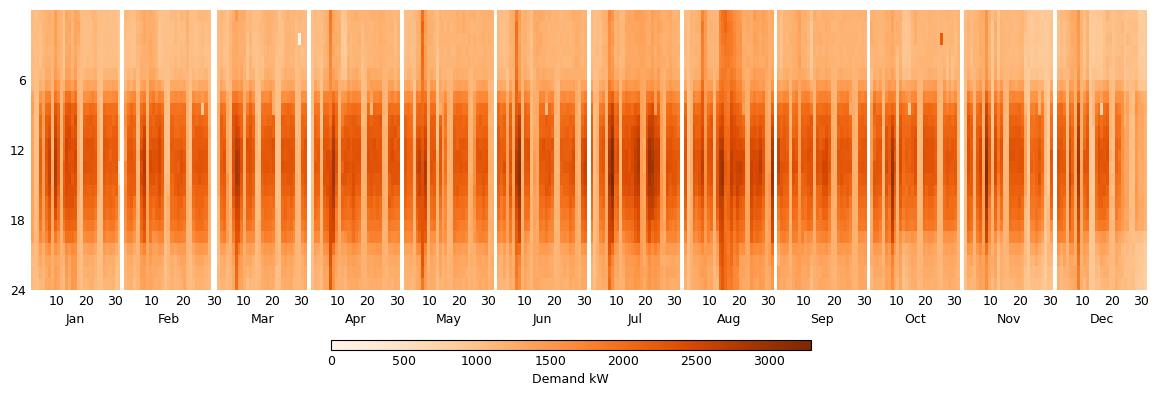

In [29]:
data.index=pd.DatetimeIndex(data['datetime'])
ts_heatmap(data.resample('H').sum(), cmap='Oranges', unit='kW')

## Also find some amazing plots you can create with Python here:

[Python Graph Gallery](https://python-graph-gallery.com)